In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Metro-Systems-Worldwide.csv")
df.head(5)

,City,Country\r\nregion,Name,Service\r\nopened,Last\r\nexpanded,Stations,System length,Annual ridership\r\n(millions)
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5 km (11.5 mi),45.3 (2019)
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7 km (35.2 mi),74.0 (2020)
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1 km (7.5 mi),23.3 (2022)
3,Sydney,Australia,Sydney Metro,2019,–,13,36 km (22 mi),16.3 (2022)
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3 km (51.8 mi),459.8 (2019)


In [3]:
df = df.rename(columns={"City":"city",
                        "Country\r\nregion": "country_region",
                        "Name":"name",
                        "Service\r\nopened":"service_opened",
                        "Last\r\nexpanded": "last_expanded",
                        "Stations":"stations",
                        "System length":"system_length(km)",
                        "Annual ridership\r\n(millions)":"annual_ridership_millions",
                        })
df.head(5)

,city,country_region,name,service_opened,last_expanded,stations,system_length(km),annual_ridership_millions
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5 km (11.5 mi),45.3 (2019)
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7 km (35.2 mi),74.0 (2020)
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1 km (7.5 mi),23.3 (2022)
3,Sydney,Australia,Sydney Metro,2019,–,13,36 km (22 mi),16.3 (2022)
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3 km (51.8 mi),459.8 (2019)


In [4]:
df.isnull().sum()

city                          0
country_region                0
name                          0
service_opened                0
last_expanded                 0
stations                      0
system_length(km)             0
annual_ridership_millions    16
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()


city                         0
country_region               0
name                         0
service_opened               0
last_expanded                0
stations                     0
system_length(km)            0
annual_ridership_millions    0
dtype: int64

In [6]:
df['annual_ridership_years'] = df["annual_ridership_millions"].str.split().str[1].str.removeprefix('(').str.removesuffix(')')
df["system_length(km)"]=df["system_length(km)"].str.split().str[0]
df['annual_ridership_millions'] = df["annual_ridership_millions"].str.split().str[0]


In [7]:
df.isnull().sum()

city                         0
country_region               0
name                         0
service_opened               0
last_expanded                0
stations                     0
system_length(km)            0
annual_ridership_millions    0
annual_ridership_years       2
dtype: int64

In [8]:
# df[df['annual_ridership_years'].isnull()]
df.loc[104,'annual_ridership_millions'] = 50.7
df.loc[104,'annual_ridership_years'] = 2018
df.loc[204,'annual_ridership_years'] = 2021
df.loc[56,'annual_ridership_years'] = 2020
df.loc[147,'annual_ridership_years'] = 2021



In [9]:
display(df['annual_ridership_years'].unique())
display(df["system_length(km)"].unique())
display(df['annual_ridership_millions'].unique())

array(['2019', '2020', '2022', '2021', '2018', 2020, '2015', 2018, '2016',
       '2009', 2021, '2011', '2010', '2017'], dtype=object)

array(['18.5', '56.7', '12.1', '36', '83.3', '40.7', '40.8', '39.9',
       '28.1', '42.38', '24.1', '43.8', '39.5', '58', '32.5', '104.4',
       '52', '69.2', '76.9', '79.6', '140', '785.7', '72.6', '207.9',
       '54.03', '518.5', '485.02', '237.74', '37.7', '114.2', '617.05',
       '75.7', '516.2', '79.4', '170.95', '49.039', '209.0', '84.25',
       '164.3', '25.9', '128.3', '449.45', '128.2', '185.36', '315.86',
       '795.5', '115.9', '547.42', '76.5', '208.2', '23.647', '288.25',
       '27.615', '53.507', '460.944', '114.8', '98.4', '278.5', '64.35',
       '232.5', '31.3', '65.4', '38.2', '31.0', '93.1', '43', '45',
       '32.0', '22.7', '226.9', '22.4', '28.2', '28.6', '147.8', '105.8',
       '95', '91.7', '37.86', '68.6', '54', '348.12', '12.8', '69',
       '12.0', '27.4', '46.96', '22.87', '46.4', '29.7', '15.7', '37.5',
       '168.2', '13.7', '8.8', '7.1', '102.5', '30.8', '60', '15.1',
       '31.4', '18.4', '38.1', '31.2', '93.3', '129.9', '48.0', '28.7',
       

array(['45.3', '74.0', '23.3', '16.3', '459.8', '202.5', '225.9', '96.3',
       '54.4', '42.8', '11.7', '48.1', '93.5', '118.7', '62', '1,104.149',
       '92.4', '245.5', '235.7', '116.6', '263.4', '2,292.65', '154.37',
       '385.76', '22.82', '1,800', '839.75', '125.22', '35.06', '94.75',
       '2,415.60', '36.98', '582.41', '51.33', '195.07', '21.30',
       '1,616.30', '8.68', '159.26', '52.48', '135.93', '801.34',
       '208.41', '159.86', '139.09', '2,834.69', '316.28', '2,178',
       '71.71', '308.57', '0.876', '338.75', '19.11', '7.01', '1,012.70',
       '87.22', '113.97', '731.04', '20.94', '341.01', '215.2', '251.4',
       '107', '49.6', '1,314', '60.4', '89.3', '159.0', '57.9', '1,339',
       '32.7', '84.4', '78.4', '492.1', '163.4', '254', '71.8', '259.2',
       '211.6', '0.4', '174.22', '42', '1,790', '18.3', '173', '7', '17',
       '256', '22', '126', '4', '5', '19.7', 50.7, '18', '820', '18.7',
       '5.8', '15.3', '386.8', '41.1', '320', '42.5', '173.3', '24

In [10]:
df.dtypes

city                         object
country_region               object
name                         object
service_opened                int64
last_expanded                object
stations                      int64
system_length(km)            object
annual_ridership_millions    object
annual_ridership_years       object
dtype: object

In [11]:
df.head(5)

,city,country_region,name,service_opened,last_expanded,stations,system_length(km),annual_ridership_millions,annual_ridership_years
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5,45.3,2019
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7,74.0,2020
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1,23.3,2022
3,Sydney,Australia,Sydney Metro,2019,–,13,36,16.3,2022
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3,459.8,2019


Text(0, 0.5, 'Count')

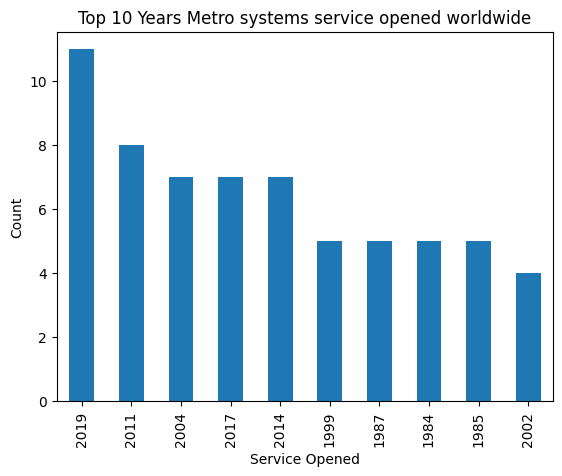

In [20]:
ax = df['service_opened'].value_counts().head(10).plot(kind='bar', title="Top 10 Years Metro systems service opened worldwide")
ax.set_xlabel("Service Opened")
ax.set_ylabel("Count")

<Axes: title={'center': 'Top 5 Country with the most metro system'}, xlabel='country_region'>

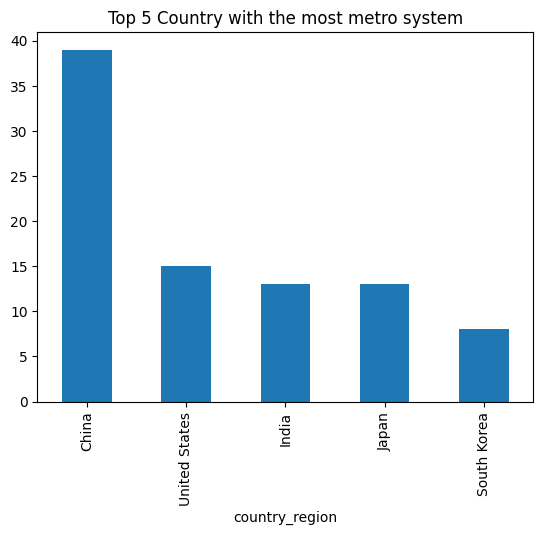

In [29]:
df["country_region"].value_counts() \
    .head(5) \
    .plot(kind="bar", title="Top 5 Country with the most metro system")


In [30]:
df.query("country_region == 'China'")

,city,country_region,name,service_opened,last_expanded,stations,system_length(km),annual_ridership_millions,annual_ridership_years
22,Beijing,China,Beijing Subway,1971,2023,370,785.7,"2,292.65",2020
23,Changchun,China,Changchun Rail Transit,2011,2021,59,72.6,154.37,2020
24,Changsha,China,Changsha Metro,2014,2022,135,207.9,385.76,2020
25,Changzhou,China,Changzhou Metro,2019,2021,43,54.03,22.82,2020
26,Chengdu,China,Chengdu Metro,2010,2020,284,518.5,"1,800",2021
27,Chongqing,China,Chongqing Rail Transit,2004,2023,238,485.02,839.75,2020
28,Dalian,China,Dalian Metro,2003,2023,99,237.74,125.22,2020
29,Dongguan,China,Dongguan Rail Transit,2016,–,15,37.7,35.06,2020
31,Fuzhou,China,Fuzhou Metro,2016,2022,74,114.2,94.75,2020
32,Guangzhou,China,Guangzhou Metro,1997,2022,254,617.05,"2,415.60",2020
